# Kvasir - classification - Vajira

# 2_4 FastAI - Resnet34 - Kvasir Dataset v2 (600,200,200) - v4

## Epochs - 4 (Equal to the value in file 2_2)

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
PATH = "data_v2/"
sz=64 # changed to 64 - 64X64 is good for satalite image analysis, Why? to study
arch=resnet34
bs=64

In [5]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs, num_workers=4, val_name='validation')
learn = ConvLearner.pretrained(arch, data)

 93%|█████████▎| 70/75 [00:15<00:01,  4.57it/s, loss=11.6]

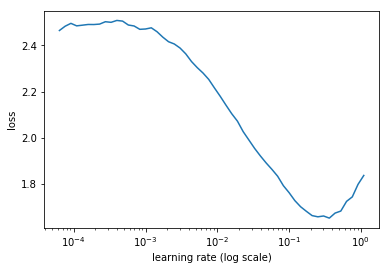

In [8]:
lrf=learn.lr_find()
learn.sched.plot()

In [10]:
lr = 0.2

In [10]:
learn.fit(lr, 4, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                 
    0      1.426414   0.706697   0.76      
    1      0.952372   0.580281   0.768125                  
    2      0.669181   0.520423   0.783125                  
    3      0.691967   0.584175   0.77625                   
    4      0.653139   0.580617   0.7625                    
    5      0.564644   0.494252   0.804375                  
    6      0.499008   0.493287   0.804375                  
    7      0.610974   0.619156   0.771875                  
    8      0.644519   0.568733   0.771875                  
    9      0.589918   0.652016   0.775                     
    10     0.570832   0.532012   0.78875                   
    11     0.514912   0.482309   0.804375                  
    12     0.47609    0.490096   0.811875                  
    13     0.440477   0.475173   0.81125                   
    14     0.422645   0.479043   0.811875                  


[array([0.47904]), 0.811875]

In [11]:
lrs = np.array([lr/9,lr/3,lr])

In [13]:
learn.unfreeze()
learn.fit(lrs, 4, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                  
    0      0.886736   0.667461   0.6925    
    1      0.80353    0.602632   0.7225                    
    2      0.638138   0.520999   0.7725                    
    3      0.648252   0.88203    0.654375                  
    4      0.597402   0.52077    0.785625                  
    5      0.514993   0.427349   0.819375                  
    6      0.430273   0.41168    0.8275                    
    7      0.528035   0.528277   0.775625                  
    8      0.524163   0.772442   0.7325                    
    9      0.480919   0.816998   0.733125                  
    10     0.417073   0.434953   0.826875                  
    11     0.353613   0.344403   0.858125                  
    12     0.309332   0.347509   0.86625                   
    13     0.262457   0.338528   0.86875                   
    14     0.25164    0.338498   0.868125                  


[array([0.3385]), 0.868125]

In [15]:
learn.save('2_4_resnet34_kvasir_11_07_2018_v1')

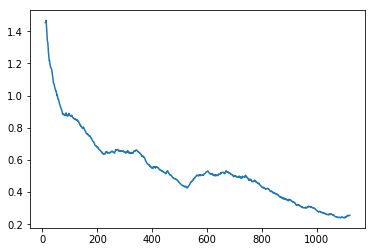

In [16]:
learn.sched.plot_loss()

In [17]:
sz=128

In [19]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs, num_workers=4,val_name='validation')

In [20]:
learn.set_data(data)
learn.freeze()
learn.fit(lr, 4, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                  
    0      0.455508   0.403654   0.84125   
    1      0.461491   0.414782   0.831875                  
    2      0.429835   0.390908   0.848125                  
    3      0.452288   0.456741   0.826875                  
    4      0.449076   0.406526   0.833125                  
    5      0.41326    0.392638   0.85                      
    6      0.406954   0.382206   0.855625                  
    7      0.439136   0.403032   0.84875                   
    8      0.445843   0.444038   0.829375                  
    9      0.447188   0.432587   0.82875                   
    10     0.424664   0.394234   0.846875                  
    11     0.413692   0.382538   0.849375                  
    12     0.411153   0.386208   0.849375                  
    13     0.399452   0.37846    0.855625                  
    14     0.400362   0.380178   0.85375                   


[array([0.38018]), 0.85375]

In [21]:
learn.unfreeze()
learn.fit(lrs, 4, cycle_len=1, cycle_mult=2)


epoch      trn_loss   val_loss   accuracy                  
    0      0.454058   0.349377   0.868125  
    1      0.446493   0.457549   0.81625                   
    2      0.337048   0.284678   0.886875                  
    3      0.402721   0.532901   0.783125                  
    4      0.376041   0.304139   0.88125                   
    5      0.291563   0.262532   0.895625                  
    6      0.230634   0.256259   0.89375                   
    7      0.334457   0.518847   0.84125                   
    8      0.33137    0.356379   0.85875                   
    9      0.289842   0.350439   0.879375                  
    10     0.266701   0.344331   0.8775                    
    11     0.210261   0.27337    0.903125                  
    12     0.17283    0.255053   0.901875                  
    13     0.15111    0.249448   0.903125                  
    14     0.138962   0.253809   0.904375                  


[array([0.25381]), 0.904375]

In [22]:
learn.save('2_4_resnet34_kvasir_11_07_2018_v2')

In [6]:
learn.load('2_4_resnet34_kvasir_11_07_2018_v2')

In [8]:
sz=256
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs, num_workers=4,val_name='validation')

In [12]:
learn.set_data(data)
learn.freeze()
learn.fit(lr, 4, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                  
    0      0.318118   0.303323   0.88625   
    1      0.323221   0.31729    0.885625                  
    2      0.293751   0.309265   0.8825                    
    3      0.299597   0.342339   0.874375                  
    4      0.3028     0.328585   0.870625                  
    5      0.296025   0.298954   0.88875                   
    6      0.291793   0.299216   0.8875                    
    7      0.310171   0.38658    0.871875                  
    8      0.311872   0.357965   0.87375                   
    9      0.304534   0.354853   0.8725                    
    10     0.291805   0.331537   0.87625                   
    11     0.294438   0.297087   0.8875                    
    12     0.276387   0.29452    0.888125                  
    13     0.264569   0.296514   0.89                      
    14     0.26498    0.295792   0.8875                    



[array([0.29579]), 0.8875]

In [13]:
learn.unfreeze()
learn.fit(lrs, 4, cycle_len=1, cycle_mult=2)
learn.save('2_4_resnet34_kvasir_12_07_2018_last')

epoch      trn_loss   val_loss   accuracy                  
    0      0.323456   0.257257   0.89875   
    1      0.346407   0.275657   0.9025                    
    2      0.249528   0.230567   0.914375                  
    3      0.333718   0.385727   0.858125                  
    4      0.290072   0.243141   0.898125                  
    5      0.23434    0.220416   0.91375                   
    6      0.181575   0.21232    0.91875                   
    7      0.261924   0.542477   0.813125                  
    8      0.288652   0.564288   0.82                      
    9      0.247193   0.255816   0.901875                  
    10     0.212199   0.256675   0.913125                  
    11     0.17862    0.227718   0.913125                  
    12     0.139844   0.222488   0.919375                  
    13     0.121858   0.208737   0.925625                  
    14     0.115422   0.203716   0.925625                  



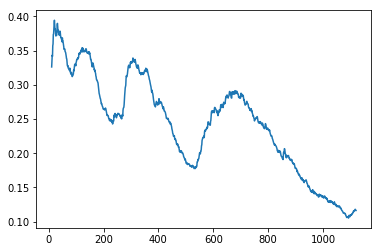

In [14]:
learn.sched.plot_loss()

In [15]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [16]:
accuracy_np(probs, y)

0.929375

## Analyzing results

### Confusion matrix 

In [17]:
preds = np.argmax(probs, axis=1)

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

In [19]:
plt.rcParams['figure.figsize'] = [15, 10]

[[192   8   0   0   0   0   0   0]
 [ 10 190   0   0   0   0   0   0]
 [  0   0 156   0   1  43   0   0]
 [  0   0   0 198   0   0   2   0]
 [  0   0   1   0 199   0   0   0]
 [  0   0  24   0   1 175   0   0]
 [  0   0   1   4   3   0 186   6]
 [  1   1   2   2   0   0   3 191]]


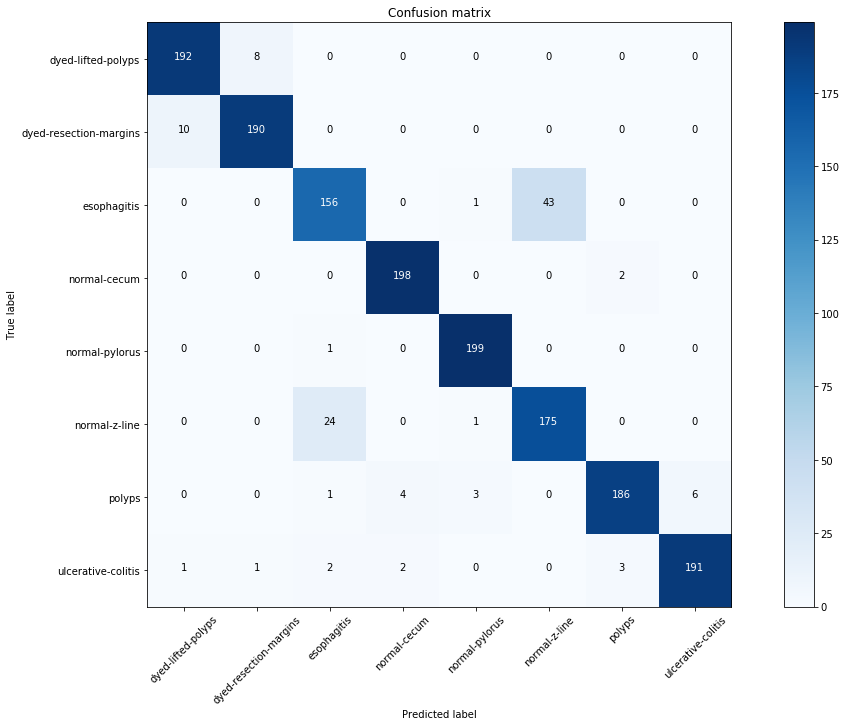

In [20]:
plot_confusion_matrix(cm, data.classes)

In [21]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs, val_name='test', num_workers=4)

In [22]:
log_preds_t,y_t = learn.TTA()

In [23]:
probs_t = np.mean(np.exp(log_preds_t),0)
accuracy_np(probs_t, y_t)

0.93

[[192   8   0   0   0   0   0   0]
 [ 10 190   0   0   0   0   0   0]
 [  0   0 155   0   1  44   0   0]
 [  0   0   0 198   0   0   2   0]
 [  0   0   0   0 200   0   0   0]
 [  0   0  21   0   1 178   0   0]
 [  0   0   1   4   3   0 185   7]
 [  1   1   2   2   0   0   4 190]]


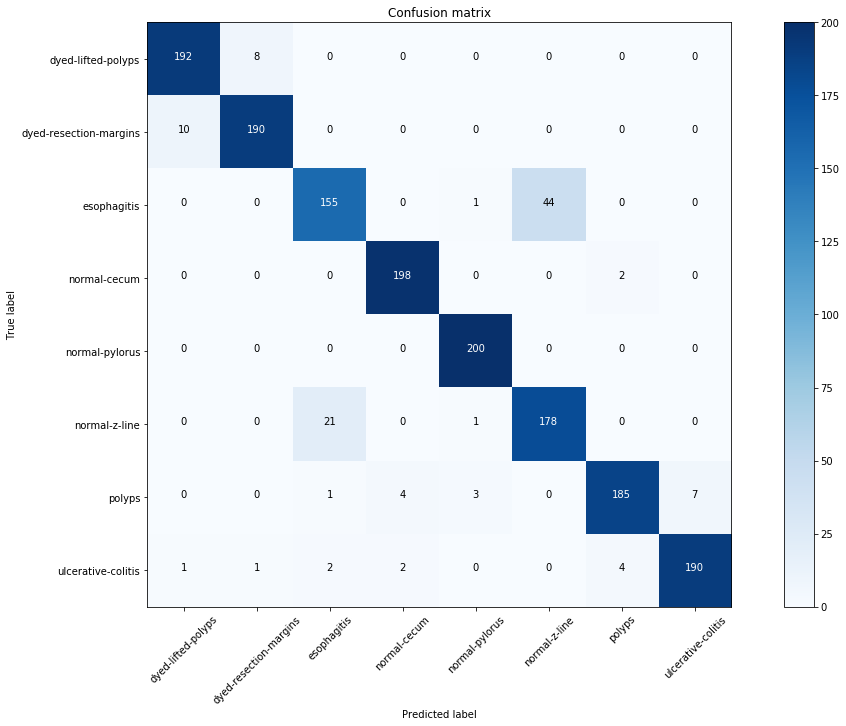

In [24]:
preds_t = np.argmax(probs_t, axis=1)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_t, preds_t)
plot_confusion_matrix(cm, data.classes)